# Homework 4: Due Sunday 11/27 11:30pm

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import decomposition
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

In [3]:
os.getcwd()
os.chdir('/content/drive/MyDrive/Senior-Fall/ECS171-Homework/HW4')
os.getcwd()

df = pd.read_csv('./bitstrings.csv')

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

Answer : I would select the single linkage such that all the points closest to each other in the cluster are considered and not just the average(average-linkage) or the farthest(complete-linkage) as I feel the closest data points should be considered.

Manhattan distance seems ideal as comparing two bitstrings is done 1 bit at a time and counting all these changes is important.

Threshold distance : 1 as the difference in between clusters should be 1 that implies the clusters can be converted to the other. That's the minimum requirement.

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

<BarContainer object of 32 artists>

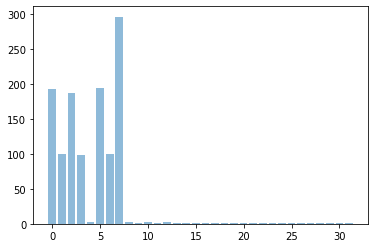

In [4]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='single',compute_full_tree = True, distance_threshold = 2)
labels = hierarchical_cluster.fit_predict(df)
unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)

## Exercise 2 - K-Means Clustering (30 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

<BarContainer object of 32 artists>

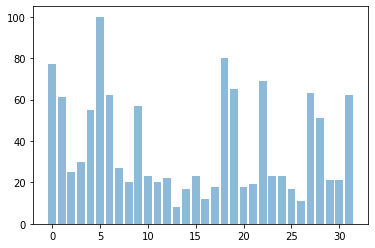

In [5]:
knn = KMeans(n_clusters = 32)
X = df
knn.fit(X)
yhat = knn.predict(df)
unique, counts = np.unique(yhat, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

The results are different because there might be some overlap in the clusters that tend to skew the results for K means and agglomerative clustering
The difference is because agglomerative clustering compares the most similar nodes whereas k means clustering does the same but chooses only k number of nodes. This essentially opens possibilities of error as some similar nodes could be missed. However in the case of agglomerative clustering, the ideal clustering grouping is formed hence the difference.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

<BarContainer object of 2 artists>

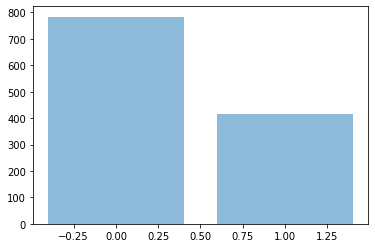

In [6]:
knn = KMeans(n_clusters = 2)   
X = df
knn.fit(X)
yhat = knn.predict(df)
unique, counts = np.unique(yhat, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

[[ 0.2391241  -0.30271419 -0.09449553  0.0561564   0.01457083 -0.19803144
  -0.37348745 -0.38136402  0.30792601  0.21393751 -0.04402243 -0.09198082
  -0.15449631 -0.0132816   0.01255839  0.31727142  0.48876393]
 [ 0.23749692  0.19235898 -0.12906263 -0.44206762 -0.21602417 -0.1573955
  -0.07953823  0.02147917 -0.12720672 -0.07628309 -0.35900479  0.45689935
  -0.2653969  -0.22002105 -0.35113349  0.10683391 -0.05558528]]
Highest feature weight is at index 16 with value 0.48876392806529456


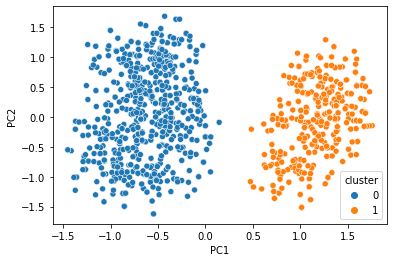

In [24]:
pca = decomposition.PCA(n_components=2)
pca.fit(df)
X = pca.transform(df)

pcadf = pd.DataFrame(data=X, columns=['PC1','PC2'])
df['cluster'] = knn.labels_
pcadf['cluster'] = df['cluster']


sns.scatterplot(x='PC1', y="PC2", data = pcadf, hue='cluster')

feature_weights = pca.components_
print(feature_weights)
print("Highest feature weight is at index {} with value {}".format(feature_weights[0].argmax(),feature_weights[0].max()))

## Exercise 4 - Collaborative Statement (5 points) 
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Alone ..